<a href="https://colab.research.google.com/github/dbetanc1/MAT421/blob/main/Module_B_Section_17_4%2C_17_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chapter 17. Interpolation

Section 17.4 Lagrange Polynomial Interpolation

* Lagrange polynomial interpolation
finds a single polynomial that goes through all the data points.


*   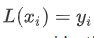

* Write them as a linear combination

*   image.png
*   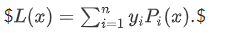



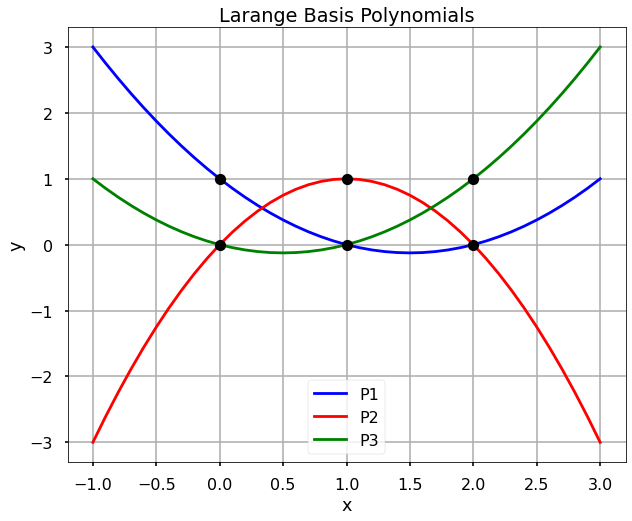

In [ ]:
# TRY IT! Find the Lagrange basis polynomials for the data set x = [0, 1, 2] 
# and y = [1, 3, 2]. Plot each polynomial and verify the property that 
# Pi(xj)=1 when i=j and Pi(xj)=0 when i ≠ j 
import numpy as np
import numpy.polynomial as poly
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

x = [0, 1, 2]
y = [1, 3, 2]
P1_coeff = [1,-1.5,.5]
P2_coeff = [0,2,-1]
P3_coeff = [0,-.5,.5]

# get the polynomial function
P1 = poly.Polynomial(P1_coeff) 
P2 = poly.Polynomial(P2_coeff) 
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(-1.0,3.1,0.1)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1(x_new), 'b', label = 'P1') 
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Larange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

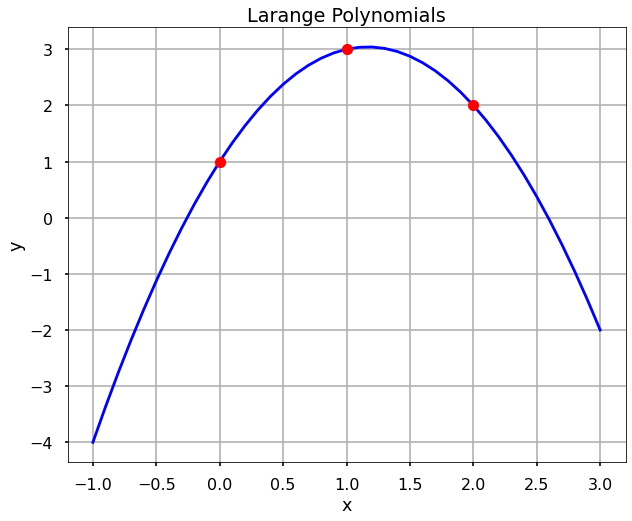

In [ ]:
# Example 2 
import numpy as np
import numpy.polynomial as poly
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

x = [0, 1, 2]
y = [1, 3, 2]
P1_coeff = [1,-1.5,.5]
P2_coeff = [0,2,-1]
P3_coeff = [0,-.5,.5]

# get the polynomial function
P1 = poly.Polynomial(P1_coeff) 
P2 = poly.Polynomial(P2_coeff) 
P3 = poly.Polynomial(P3_coeff)

L = P1 + 3*P2 + 2*P3

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro') 
plt.title('Larange Polynomials')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

WARNING! Lagrange interpolation polynomials are dened outside the area of interpolation, that is outside of the
interval  , will grow very fast and unbounded outside this region. This is not a desirable feature because in
general, this is not the behavior of the underlying data. Thus, a Lagrange interpolation should never be used to
interpolate outside this region.

Using lagrange from scipy
Instead of we calculate everything from scratch, in scipy, we can use the lagrange function directly to interpolate the
data.

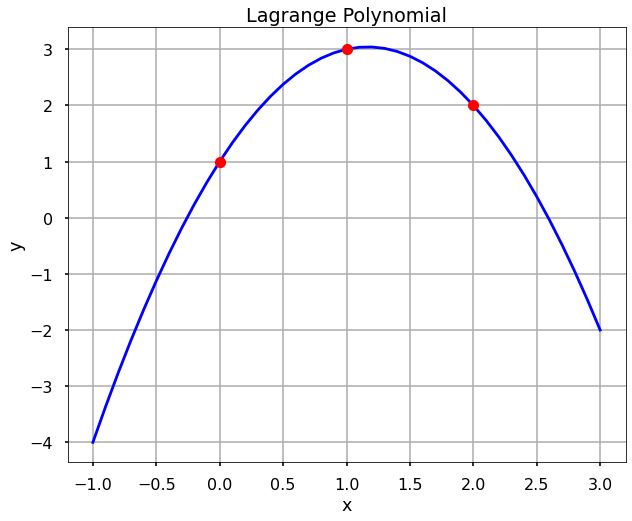

In [ ]:
from scipy.interpolate.interpolate import lagrange
#Reattempt Example 2 with scipy

from scipy.interpolate import lagrange

f = lagrange(x,y)
fig = plt.figure(figsize=(10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Section 17.5 Newton’s Polynomial Interpolation

Another popular way to fit exactly for a set of data points. The general form of the an n−1 order Newton’s polynomial that goes through n points is:
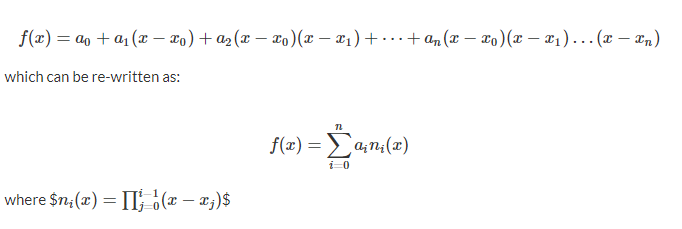

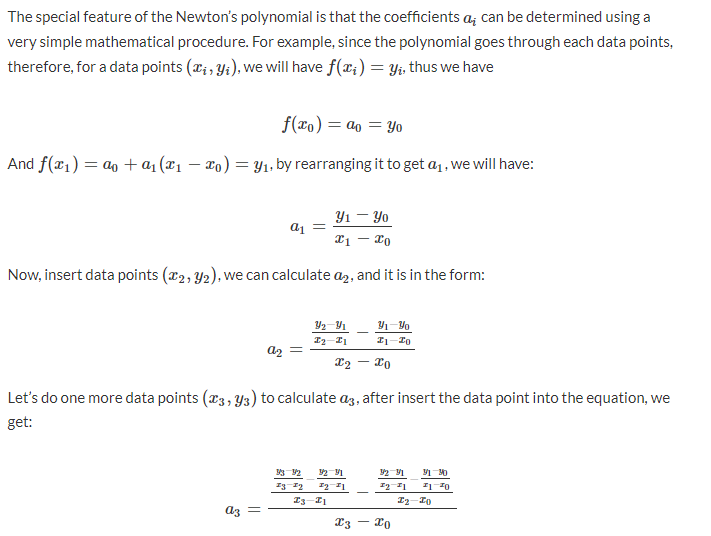

Divided differences
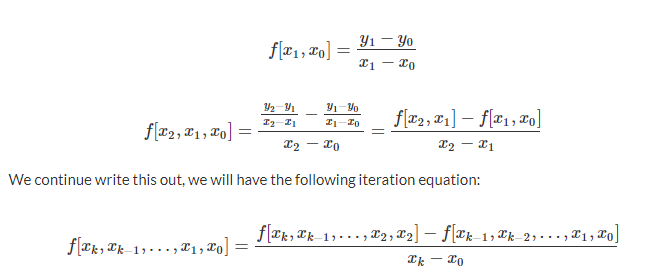
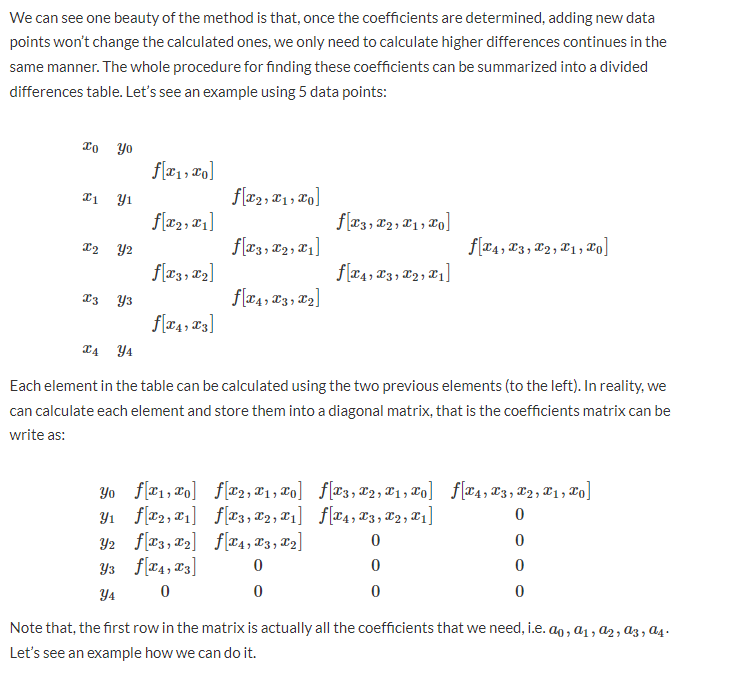

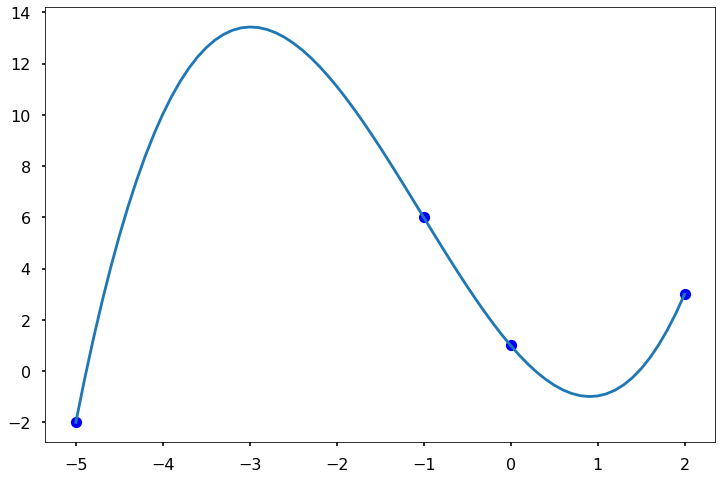

In [ ]:
# TRY IT! Calculate the divided differences table for 
#x = [-5, -1, 0, 2], y = [-2, 6, 1, 3].

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)